# Prediksi Gender Berdasarkan Nama Bayi

## Data Understanding


### Sumber dataset

https://archive.ics.uci.edu/dataset/591/gender+by+name

Citations:

* Gender by Name [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C55G7X.

### Penjelasan Fitur dan Variabel

Dataset ini mengaitkan nama depan dengan jenis kelamin, memberikan jumlah dan probabilitas. Dataset ini menggabungkan data pemerintah sumber terbuka dari Amerika Serikat, Inggris, Kanada, dan Australia.

Dataset ini menggabungkan hitungan mentah untuk nama depan/beri nama bayi laki-laki dan perempuan pada periode waktu tersebut, dan kemudian menghitung probabilitas untuk sebuah nama berdasarkan hitungan agregat.  Sumber dataset berasal dari otoritas pemerintah:

- AS: Nama Bayi dari Aplikasi Kartu Jaminan Sosial - Data Nasional, 1880 hingga 2019
- INGGRIS:  Nama-nama bayi di buletin statistik Inggris dan Wales, 2011 hingga 2018
- Kanada: British Columbia 100 Tahun Nama Bayi Populer, 1918 hingga 2018
- Australia:  Nama-nama Bayi Populer, Departemen Kejaksaan Agung, 1944 hingga 2019

Tujuan dari dataset ini adalah untuk mempelajari pola nama yang umum digunakan oleh bayi laki-laki dan perempuan, serta membangun model klasifikasi yang mampu memprediksi gender berdasarkan struktur nama.

Dataset ini cocok untuk eksplorasi linguistik dan pemodelan machine learning berbasis fitur teks sederhana.

Fitur yang digunakan

* Nama
* Jenis Kelamin
* Jumlah
* Probabilitas

### Eksplorasi data


Dataset ini tidak ada missing value

### Visualisasi data

In [ ]:
%pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
gender_by_name = fetch_ucirepo(id=591)

# data (as pandas dataframes)
X = gender_by_name.data.features
y = gender_by_name.data.targets

# metadata
print(gender_by_name.metadata)

# variable information
print(gender_by_name.variables)


{'uci_id': 591, 'name': 'Gender by Name', 'repository_url': 'https://archive.ics.uci.edu/dataset/591/gender+by+name', 'data_url': 'https://archive.ics.uci.edu/static/public/591/data.csv', 'abstract': 'This dataset attributes first names to genders, giving counts and probabilities.  It combines open-source government data from the US, UK, Canada, and Australia.\n', 'area': 'Social Science', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Text'], 'num_instances': 147270, 'num_features': 4, 'feature_types': [], 'demographics': ['Gender'], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C55G7X', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This dataset combines raw counts for first/given names of male and female babies in those time periods, and then calculates a probability for a name given the aggregate cou

In [ ]:
import pandas as pd

# Gabungkan fitur dan target
df_genderbyname = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_genderbyname))
print("Visualisasi dataset genderbyname")
print(df_genderbyname)


Total baris dataset ini adalah = 147269
Visualisasi dataset genderbyname
           Name Gender    Count   Probability
0         James      M  5304407  1.451679e-02
1          John      M  5260831  1.439753e-02
2        Robert      M  4970386  1.360266e-02
3       Michael      M  4579950  1.253414e-02
4       William      M  4226608  1.156713e-02
...         ...    ...      ...           ...
147264   Zylenn      M        1  2.736740e-09
147265   Zymeon      M        1  2.736740e-09
147266   Zyndel      M        1  2.736740e-09
147267   Zyshan      M        1  2.736740e-09
147268    Zyton      M        1  2.736740e-09

[147269 rows x 4 columns]


In [ ]:
# Simpan ke file CSV
df_genderbyname.to_csv('datasetgenderbyname.csv', index=False)

## Preprocessing Data

### Encoding

Karena model decision tree hanya menerima input numerik, maka fitur berupa huruf perlu diubah menjadi angka menggunakan Label Encoding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# === 1. Load Data ===
df = pd.read_csv("/content/datasetgenderbyname.csv")  # Ganti dengan path file Anda jika diperlukan
data = df.copy()

# === 2. Fitur Ekstraksi dari Nama ===
data['first_letter'] = data['Name'].apply(lambda x: x[0].lower())       # huruf pertama
data['last_letter'] = data['Name'].apply(lambda x: x[-1].lower())       # huruf terakhir
data['last2_letters'] = data['Name'].apply(lambda x: x[-2:].lower())    # 2 huruf terakhir
data['name_length'] = data['Name'].apply(len)                           # panjang nama

# === 3. Encoding Fitur Kategorikal ===
le_gender = LabelEncoder()
le_first = LabelEncoder()
le_last = LabelEncoder()
le_last2 = LabelEncoder()

data['gender_encoded'] = le_gender.fit_transform(data['Gender'])              # target
data['first_encoded'] = le_first.fit_transform(data['first_letter'])          # fitur
data['last_encoded'] = le_last.fit_transform(data['last_letter'])
data['last2_encoded'] = le_last2.fit_transform(data['last2_letters'])

### Pemilihan Fitur

In [ ]:
# === 4. Definisikan Fitur dan Target ===
X = data[['first_encoded', 'last_encoded', 'last2_encoded', 'name_length']]
y = data['gender_encoded']

### Splitting Data

In [ ]:
# === 5. Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Visualisasi Data setelah Normalisasi

In [ ]:
print(data)

           Name Gender    Count   Probability first_letter last_letter  \
0         James      M  5304407  1.451679e-02            j           s   
1          John      M  5260831  1.439753e-02            j           n   
2        Robert      M  4970386  1.360266e-02            r           t   
3       Michael      M  4579950  1.253414e-02            m           l   
4       William      M  4226608  1.156713e-02            w           m   
...         ...    ...      ...           ...          ...         ...   
147264   Zylenn      M        1  2.736740e-09            z           n   
147265   Zymeon      M        1  2.736740e-09            z           n   
147266   Zyndel      M        1  2.736740e-09            z           l   
147267   Zyshan      M        1  2.736740e-09            z           n   
147268    Zyton      M        1  2.736740e-09            z           n   

       last2_letters  name_length  gender_encoded  first_encoded  \
0                 es            5          

In [ ]:
# Simpan ke file CSV
data.to_csv('datasetgenderbynameprep.csv', index=False)

## Modelling

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

### Modelling Klasifikasi Gender Berdasarkan Nama Bayi menggunakan Decision Tree


1. Tujuan Pemodelan

Pemodelan ini bertujuan untuk mengklasifikasikan jenis kelamin (gender) seorang bayi berdasarkan nama depannya. Nama bayi dapat mencerminkan kecenderungan gender tertentu, dan model klasifikasi bertujuan mempelajari pola tersebut dari data historis.

Kategori kelas target dalam model ini terdiri dari dua kelas:

* Laki-laki (`Male`)
* Perempuan (`Female`)

Model klasifikasi yang digunakan adalah Decision Tree Classifier, yaitu metode *supervised learning* berbasis pohon keputusan. Setiap cabang dalam pohon mewakili keputusan berdasarkan fitur dari nama, dan setiap daun menunjukkan hasil klasifikasi gender.

2. Pembagian Dataset: Data Latih dan Data Uji

Langkah awal dalam pemodelan adalah membagi dataset menjadi dua bagian utama:

* Data Latih (Training Set): digunakan untuk melatih model agar mengenali pola dalam data.
* Data Uji (Testing Set): digunakan untuk menguji akurasi model terhadap data baru yang belum pernah dilihat sebelumnya.

Dalam eksperimen ini digunakan pembagian data dengan rasio 80:20, artinya 80% data untuk pelatihan dan 20% untuk pengujian. Pemilihan rasio ini fleksibel, tergantung pada ukuran dan distribusi dataset.

3. Pra-Pemrosesan Data

Sebelum digunakan dalam model, dilakukan beberapa langkah *preprocessing* terhadap data nama bayi:

* Label Encoding pada kolom `Gender` untuk mengubah nilai kategorikal (`'M'`, `'F'`) menjadi angka (`1` untuk laki-laki dan `0` untuk perempuan).
* Ekstraksi fitur dari kolom `Name`, antara lain:

  * `first_letter`: huruf pertama dari nama
  * `last_letter`: huruf terakhir dari nama
  * `last2_letters`: dua huruf terakhir
  * `name_length`: panjang jumlah huruf dari nama
* Semua fitur kategorikal tersebut dikonversi menjadi format numerik menggunakan LabelEncoder dari `sklearn`.

Fitur-fitur tersebut cukup representatif untuk membantu model mengenali pola nama yang cenderung digunakan untuk laki-laki atau perempuan.

4. Pelatihan Model Decision Tree

Model dilatih menggunakan algoritma Decision Tree Classifier dengan parameter:

* Kriteria: `gini` (untuk mengukur ketidakmurnian node)
* Kedalaman maksimum: `5` (untuk mencegah model terlalu kompleks atau *overfitting*)

Pohon keputusan dibangun dengan membagi data berdasarkan fitur-fitur nama yang paling membantu dalam membedakan gender. Proses ini dilakukan secara rekursif sampai kedalaman tertentu.

5. Evaluasi Model

Setelah pelatihan, model dievaluasi menggunakan metrik berikut:

* Akurasi: proporsi prediksi yang benar dibandingkan total data uji.
* Classification Report: menunjukkan metrik precision, recall, dan F1-score untuk masing-masing kelas gender (`Male` dan `Female`).
* Confusion Matrix: untuk melihat bagaimana prediksi model tersebar di antara kelas-kelas sebenarnya.
* Visualisasi Struktur Pohon: memperlihatkan bagaimana model membuat keputusan berdasarkan urutan fitur dan nilai yang diuji.

6. Prediksi dan Interpretasi

Model yang sudah terlatih dapat digunakan untuk:

* Memprediksi gender dari nama bayi baru.
* Menganalisis fitur yang paling memengaruhi keputusan model (misalnya, huruf terakhir dari nama lebih sering membedakan gender secara signifikan).

Kesimpulan

Decision Tree merupakan metode klasifikasi yang cocok untuk kasus klasifikasi gender berdasarkan nama karena:

* Mampu menangani data kategorikal dan numerik tanpa normalisasi.
* Memberikan interpretasi visual yang mudah dipahami.
* Cepat dan efisien dalam pelatihan serta prediksi.

Model ini dapat menjadi alat bantu klasifikasi berbasis nama, misalnya untuk keperluan statistik, analisis populasi, atau sistem rekomendasi yang mempertimbangkan gender.


Akurasi: 0.7616622530046853

=== Classification Report ===
              precision    recall  f1-score   support

           F       0.79      0.83      0.81     18029
           M       0.71      0.66      0.68     11425

    accuracy                           0.76     29454
   macro avg       0.75      0.74      0.75     29454
weighted avg       0.76      0.76      0.76     29454



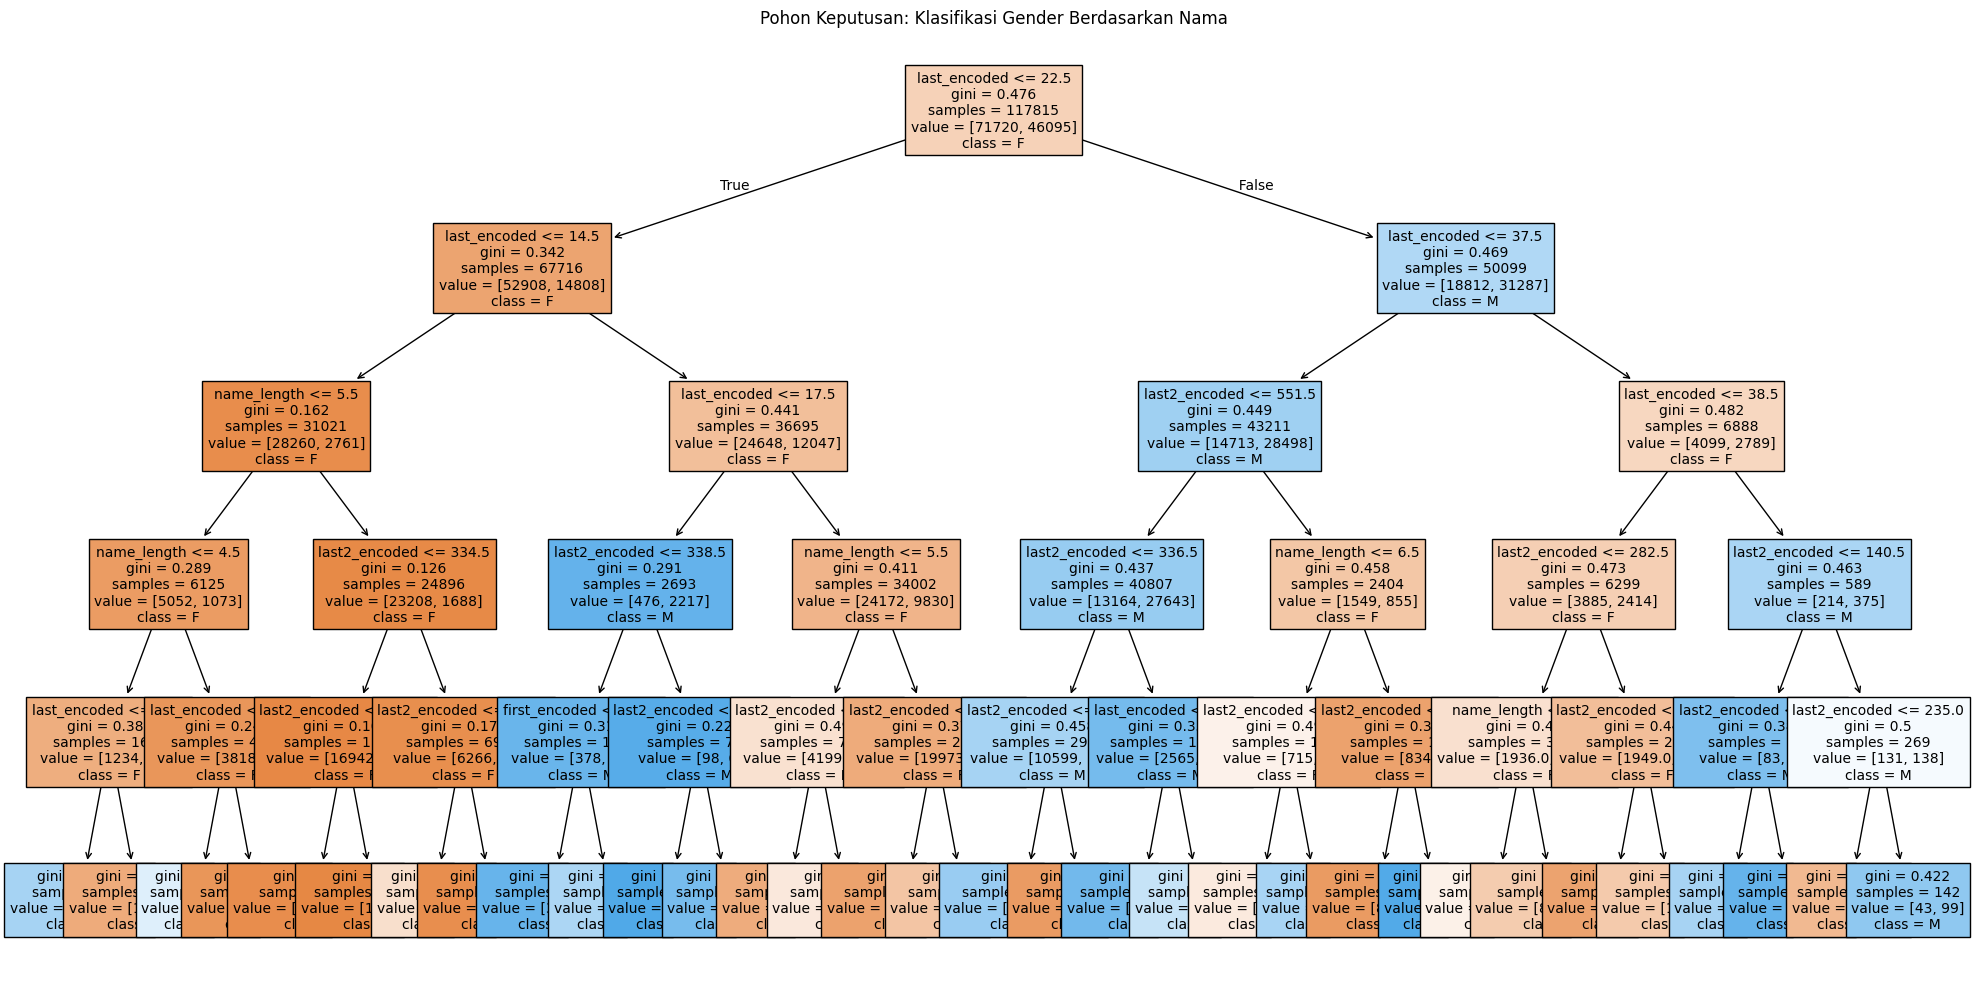

In [ ]:

# === 6. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 7. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le_gender.classes_))

# === 8. Visualisasi Pohon Keputusan ===
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le_gender.classes_,
          filled=True,
          fontsize=10)
plt.title("Pohon Keputusan: Klasifikasi Gender Berdasarkan Nama")
plt.tight_layout()
plt.show()


### Modelling Klasifikasi Gender Berdasarkan Nama Menggunakan Naive Baye

1. Tujuan Pemodelan**

Pemodelan ini bertujuan untuk **mengklasifikasikan jenis kelamin (gender)** seorang bayi berdasarkan **nama depannya**. Berdasarkan data historis dari berbagai negara, terdapat pola statistik yang membedakan nama laki-laki dan perempuan.

Model klasifikasi yang digunakan adalah **Naive Bayes**, sebuah metode probabilistik berbasis **teorema Bayes** dengan asumsi independensi antar fitur. Meskipun sederhana, model ini efektif untuk klasifikasi berbasis teks dan data kategorikal seperti nama.

2. Pembagian Dataset: Data Latih dan Data Uji**

Dataset dibagi menjadi dua bagian:

* **Data Latih (Training Set)**: digunakan untuk membangun model dan menghitung probabilitas.
* **Data Uji (Testing Set)**: digunakan untuk menguji keakuratan model pada data yang belum pernah dilihat sebelumnya.

Untuk eksperimen ini digunakan pembagian data dengan rasio **80% data latih** dan **20% data uji**, yang umum digunakan untuk memastikan keseimbangan antara pelatihan dan evaluasi.

3. Pra-Pemrosesan Data**

Agar model Naive Bayes dapat bekerja dengan baik, dilakukan beberapa tahapan *preprocessing*:

* **Label Encoding** pada kolom `Gender`, mengubah `'M'` dan `'F'` menjadi `1` dan `0`.
* **Ekstraksi fitur dari nama**, seperti:

  * `first_letter`: huruf pertama dari nama
  * `last_letter`: huruf terakhir dari nama
  * `last2_letters`: dua huruf terakhir dari nama
  * `name_length`: panjang nama dalam jumlah huruf
* Fitur-fitur tekstual dikodekan menggunakan **LabelEncoder** menjadi angka kategorikal.
* Karena fitur bersifat diskrit dan kategorikal, model yang digunakan adalah **Categorical Naive Bayes (`CategoricalNB`)**, yang dirancang khusus untuk data diskrit.

4. Pelatihan Model Naive Bayes**

Model dilatih menggunakan algoritma **Categorical Naive Bayes**, yang bekerja dengan menghitung probabilitas setiap kelas (`M` atau `F`) berdasarkan kombinasi fitur.

Setiap fitur (huruf pertama, huruf terakhir, dsb.) diasumsikan independen satu sama lain, dan Naive Bayes menghitung probabilitas gabungan menggunakan aturan:

$$
P(\text{Gender} \mid \text{Fitur}) \propto P(\text{Gender}) \prod P(\text{Fitur}_i \mid \text{Gender})
$$

5. Evaluasi Model**

Model yang telah dilatih dievaluasi menggunakan beberapa metrik:

* **Akurasi**: persentase prediksi yang benar dari total data uji.
* **Classification Report**:

  * **Precision**: seberapa tepat prediksi model untuk tiap kelas
  * **Recall**: seberapa lengkap model mengenali tiap kelas
  * **F1-Score**: harmonic mean dari precision dan recall
* **Confusion Matrix**:

  * Menampilkan jumlah prediksi benar dan salah untuk masing-masing kelas
  * Dapat divisualisasikan dalam bentuk **heatmap**

6. Prediksi dan Interpretasi**

Setelah evaluasi, model dapat digunakan untuk:

* **Memprediksi gender bayi** berdasarkan nama baru.
* **Menilai pola nama** yang cenderung digunakan oleh laki-laki atau perempuan.
* Menggunakan output probabilitas untuk mengukur keyakinan model terhadap prediksi (jika diperlukan).

Kesimpulan**

Naive Bayes adalah model klasifikasi yang:

* **Cepat, sederhana, dan efisien** dalam menangani data kategorikal seperti nama bayi.
* **Cocok untuk dataset besar** karena waktu pelatihan dan prediksi yang sangat cepat.
* **Memberikan hasil cukup baik**, terutama jika fitur-fitur yang diekstrak memiliki kekuatan diskriminatif yang tinggi.

Dalam kasus klasifikasi nama bayi, model ini bisa digunakan sebagai dasar pembuatan sistem otomatis klasifikasi gender, cocok untuk aplikasi seperti validasi data, survei demografis, hingga sistem rekomendasi berbasis gender.


Akurasi: 0.7698445032932708

=== Classification Report ===
              precision    recall  f1-score   support

           F       0.82      0.79      0.81     18029
           M       0.69      0.73      0.71     11425

    accuracy                           0.77     29454
   macro avg       0.76      0.76      0.76     29454
weighted avg       0.77      0.77      0.77     29454



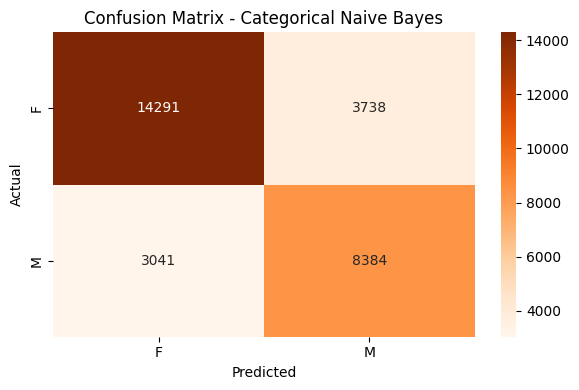

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Training model Naive Bayes kategorikal ===
model = CategoricalNB()
model.fit(X_train, y_train)

# === Evaluasi ===
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le_gender.classes_))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)

# Tampilkan sebagai tabel dan visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le_gender.classes_,
            yticklabels=le_gender.classes_)
plt.title("Confusion Matrix - Categorical Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### Modelling Klasifikasi Gender Berdasarkan Nama Menggunakan KNN

1. Tujuan Pemodelan

Tujuan dari pemodelan ini adalah untuk mengklasifikasikan jenis kelamin bayi (laki-laki atau perempuan) berdasarkan nama depannya. Data yang digunakan mencakup nama-nama bayi dari berbagai negara, dan nama tersebut diyakini mengandung pola yang mencerminkan gender.

Model yang digunakan adalah K-Nearest Neighbors (KNN), yaitu algoritma *supervised learning* berbasis kedekatan. Dalam KNN, prediksi ditentukan berdasarkan mayoritas label dari sejumlah data pelatihan terdekat (tetangga terdekat) dalam ruang fitur.

2. Pembagian Dataset: Data Latih dan Data Uji

Data dibagi menjadi dua bagian utama:

* Data Latih (Training Set): digunakan untuk menyimpan data referensi.
* Data Uji (Testing Set): digunakan untuk menguji performa prediksi pada data baru.

Eksperimen ini menggunakan rasio pembagian 80:20, yaitu 80% data untuk pelatihan dan 20% untuk pengujian. Rasio ini dipilih untuk menjaga keseimbangan antara kapasitas belajar model dan evaluasi yang akurat.

3. Pra-Pemrosesan Data

Sebelum digunakan dalam model KNN, data melalui beberapa tahapan *preprocessing* sebagai berikut:

* Label Encoding pada kolom `Gender`, mengubah `'M'` dan `'F'` menjadi angka (`1` dan `0`).
* Ekstraksi fitur dari nama, seperti:

  * `first_letter`: huruf pertama dari nama
  * `last_letter`: huruf terakhir dari nama
  * `last2_letters`: dua huruf terakhir
  * `name_length`: jumlah huruf dalam nama
* Semua fitur berbentuk teks dikonversi menjadi angka menggunakan LabelEncoder dari `sklearn`.

Karena KNN bekerja berdasarkan jarak antar titik dalam ruang fitur, penting bahwa semua fitur bersifat numerik. Pada tahap ini, fitur-fitur tersebut telah memenuhi kriteria.


4. Pelatihan Model K-Nearest Neighbors

Berbeda dengan algoritma lain, KNN tidak membentuk model eksplisit selama pelatihan. Sebaliknya, model hanya menyimpan data pelatihan.

Untuk setiap instance baru yang ingin diprediksi, algoritma akan:

1. Menghitung jarak (biasanya Euclidean) terhadap semua data latih.
2. Mengambil k data latih terdekat (misal, `k=5`).
3. Melakukan voting untuk menentukan kelas terbanyak di antara tetangga terdekat tersebut.

Pemilihan nilai k penting untuk keseimbangan antara generalisasi dan ketelitian. Dalam eksperimen ini digunakan k = 5.


5. Evaluasi Model

Model KNN dievaluasi menggunakan data uji dengan metrik berikut:

* Akurasi: proporsi prediksi yang benar dari total prediksi.
* Classification Report:

  * Precision: ketepatan prediksi untuk setiap kelas
  * Recall: seberapa banyak kasus sebenarnya yang berhasil diprediksi
  * F1-Score: rata-rata harmonis antara precision dan recall
* Confusion Matrix: menunjukkan distribusi prediksi benar dan salah pada masing-masing kelas, dan divisualisasikan dalam bentuk heatmap.


6. Prediksi dan Interpretasi

Setelah model KNN siap, dapat digunakan untuk:

* Memprediksi gender bayi dari nama yang baru berdasarkan pola nama yang mirip dalam dataset.
* Mengidentifikasi nama-nama yang memiliki kecenderungan kuat terhadap suatu gender, berdasarkan nama-nama tetangga terdekat.


Kesimpulan

K-Nearest Neighbors merupakan metode klasifikasi yang:

* Sederhana namun powerful, terutama untuk data numerik hasil transformasi dari kategori seperti nama.
* Tidak memerlukan pelatihan berat, karena prediksi dilakukan saat inferensi.
* Fleksibel, namun perlu penyesuaian parameter seperti jumlah tetangga (`k`) dan metode pengukuran jarak.

Meskipun lebih lambat saat prediksi pada dataset besar, KNN tetap menjadi pilihan yang baik untuk eksplorasi awal dan dapat menjadi baseline untuk klasifikasi berbasis nama.


Akurasi: 0.7499830243769946

=== Classification Report ===
              precision    recall  f1-score   support

           F       0.80      0.80      0.80     18029
           M       0.68      0.68      0.68     11425

    accuracy                           0.75     29454
   macro avg       0.74      0.74      0.74     29454
weighted avg       0.75      0.75      0.75     29454



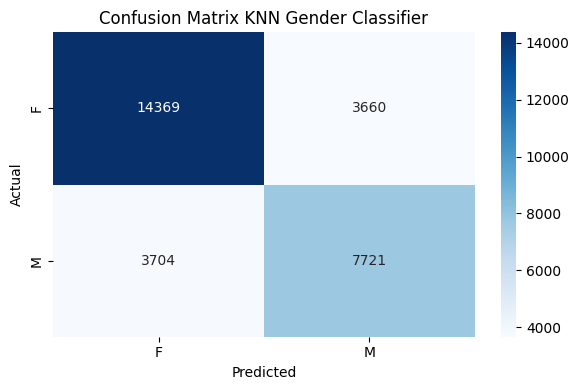

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Training KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# === Evaluasi ===
y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le_gender.classes_))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_gender.classes_,
            yticklabels=le_gender.classes_)
plt.title("Confusion Matrix KNN Gender Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Evaluasi Data

Dari dataset klasifikasi gender berdasarkan nama bayi diatas, akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

* Decision Tree = 76,17%
* Categorical Naive Bayes = 76,98%
* K-Nearest Neighbor = 75%

Dari ketiga model diatas dapat disimpulkan bahwa Categorical Naive Bayes memiliki akurasi tertinggi yaitu 76,98%.